# Traffic Light Classifier
---
*Adapted from Final Project of Computer Vision and Machine Learning: Introduction to Self-Driving Cars, Nanodegree of Udacity*

In this project, we will build a classifier for images of traffic lights. There will three types of light based on which one of the three lights is illuminated: red, green, or yellow.

To do this, we will apply four tasks:

1. **Loading and visualizing the data**
    In this step, we will try to be familiar with the data by loading the images of the traffic light and visualize them.
2. **Pre-processing**
    Standardizing the input images and output labels is important. This will help to analyze the rest of the input images with the same classification pipeline. This step also help us to know about the output to expect when classifying a *new* image.
3. **Feature extraction**. 
    In this step, we'll extract some features from each image, These features will be used to distinguish and classify images.
4. **Classification and visualizing error**. 
    Last, we'll write one function that uses your features to classify *any* traffic light image. This function will take in an image and output a label.

Below is the sample images from the dataset (from left to right: red, green, and yellow traffic lights):
<img src="images/all_lights.png" width="50%" height="50%">


## 1. Loading and Vizualizing the dataset of traffic light

The dataset consists of 1484 images in three categories: red, yellow, and green. The number of data is not evenly distributed due to the nature of human-sourced data. Below is the detail:
* 904 red traffic light images
* 536 green traffic light images
* 44 yellow traffic light images

The data was gathered from final project of "Computer Vision and Machine Learning: Introduction to Self-Driving Cars, Nanodegree of Udacity". According to them, all images used in this project are from [MIT self-driving car course](https://selfdrivingcars.mit.edu/) and are licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).

### Import resources

First, we will import the required libraries and resources

In [1]:
import cv2 # computer vision library
import helpers # helper functions

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images
import pandas as pd

%matplotlib inline

## Training and Testing Data

All 1484 of the traffic light images are separated into training and testing datasets. 

* 80% of these images are training images, we will use this to create our classifier.
* 20% are test images, which we will use to test the accuracy of your classifier.
* All images are pictures of 3-light traffic lights with one light illuminated.

## Define the directories of the image

First, we set some variables to keep track of some where our images are stored:

    IMAGE_DIR_TRAINING: the directory of training image data
    IMAGE_DIR_TEST: the directory of test image data

In [2]:
# Image data directories
IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST = "traffic_light_images/test/"

## Load the datasets

We will load the training traffic light images and store all of them in a variable called `IMAGE_LIST`. This list contains the images and their associated label ("red", "yellow", "green"). 

In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TRAINING)


## Visualize the Data

---
### Visualize the input images
We will show the image of the first data with its corresponding image label and its shape.

Shape of the image:  (81, 43, 3)
Images label:  red


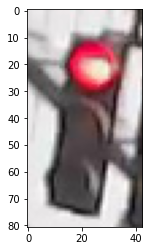

In [4]:
# The first image in IMAGE_LIST is displayed below
selected_image = IMAGE_LIST[0][0]
plt.imshow(selected_image)
print('Shape of the image: ', selected_image.shape)
print('Images label: ', IMAGE_LIST[0][1])

# 2. Pre-process the Data

After loading in each image, we will standardize the input and output!

### Input

Every input image should be in the same format and sie. It's important for a classification task that **those images have similar features**! 

### Output

We need the output to be a label that is easy to read and easy to compare with other labels. 

A very common classification output is a 1D list that is the length of the number of classes - three in the case of red, yellow, and green lights - with the values 0 or 1 indicating which class a certain image is. For example, since we have three classes (red, yellow, and green), we can make a list with the order: [red value, yellow value, green value]. In general, order does not matter, we choose the order [red value, yellow value, green value] in this case to reflect the position of each light in descending vertical order.

A red light should have the  label: [1, 0, 0]. Yellow should be: [0, 1, 0]. Green should be: [0, 0, 1]. These labels are called **one-hot encoded labels**.

<img src="images/processing_steps.png" width="80%" height="80%">


### Standardize the input images

We will resize each image to the desired input size: 32x32px.

In [5]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    
    standard_im = np.copy(image)
    standard_im = cv2.resize(standard_im, (32,32))
    
    return standard_im
    

## Standardize the output

We specified the expected output by using **one-hot encoding** for each loaded image.

* One-hot encode the labels. To do this, create an array of zeros representing each class of traffic light (red, yellow, green), and set the index of the expected class number to 1. 

Since we have three classes (red, yellow, and green), we have imposed an order of: [red value, yellow value, green value]. To one-hot encode, say, a yellow light, we would first initialize an array to [0, 0, 0] and change the middle value (the yellow value) to 1: [0, 1, 0].


In [6]:
def one_hot_encode(label):
    '''One-hot encode the labels
    
    Examples: 
    one_hot_encode("red") should return: [1, 0, 0]
    one_hot_encode("yellow") should return: [0, 1, 0]
    one_hot_encode("green") should return: [0, 0, 1]

    '''
    
    one_hot_encoded = []
    if label == 'red':
        one_hot_encoded = [1, 0 ,0]
    elif label == 'yellow':
        one_hot_encoded = [0, 1 ,0]
    else:
        one_hot_encoded = [0, 0 ,1]
    
    return one_hot_encoded


### Testing as you Code

It is a good practice to test a code in small, functional pieces after we write it. We will test the code using `test_functions.py`. If the code works, it will print `TEST PASSED`.

In [7]:
# Importing the tests
import test_functions
tests = test_functions.Tests()

# Test for one_hot_encode function
tests.test_one_hot(one_hot_encode)


**<span style="color: green;">TEST PASSED</span>**

## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and one-hot encoded labels.

This uses the functions we defined above to standardize the input and output, so those functions must be complete for this standardization to work!

In [8]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # One-hot encode the label
        one_hot_label = one_hot_encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, one_hot_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## Visualize the standardized data

Display first three standardized image from STANDARDIZED_LIST and compare it with a non-standardized image from IMAGE_LIST. Note that their sizes and appearance are different!

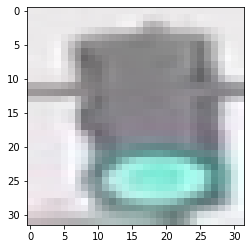

Shape of the image:  (32, 32, 3)
Images label:  [0, 0, 1]


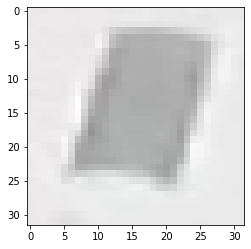

Shape of the image:  (32, 32, 3)
Images label:  [0, 0, 1]


In [9]:
## Display first three standardized image and its label
for i in range(938,940):
    selected_image = STANDARDIZED_LIST[i][0]
    plt.imshow(selected_image)
    plt.show()
    print('Shape of the image: ', selected_image.shape)
    print('Images label: ', STANDARDIZED_LIST[i][1])
    # Convert to HSV
    hsv = cv2.cvtColor(STANDARDIZED_LIST[i][0], cv2.COLOR_RGB2HSV)

# 3. Feature Extraction

We will use color spaces, shape analysis, and feature construction to create features that can help distinguish and classify the three types of traffic light images.

### Create a brightness feature that uses HSV color space

We write a function that takes in an RGB image and returns a 1D feature vector that will help classify an image of a traffic light. We use a pipeline as follows:
1. Convert the traffic light figure into HSV.
2. Filter the traffic light figure based on the brightness value, selecting those with a value less than 150, and store it in a variable called cropped_image.
3. Crop the figure to include only non-zero pixels.
4. Define the values of H, S, and V that we will use to filter cropped_image.
5. After the filtering process, we count the total value of brightness for each pixel.

In [10]:
def create_feature(rgb_image):
    
    # Convert to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    v = hsv[:,:,2]

    rgb_image_copy = rgb_image.copy()

    # Set brightness v value into 0 if it is less than 150
    brightness_feature = (v < 150)
    rgb_image[brightness_feature] = [0, 0, 0]

    # Find the coordinates of the non-zero pixels in the image mask
    non_zero_pixels = np.nonzero(rgb_image)
    # Determine the minimum and maximum x and y coordinates
    min_x = np.min(non_zero_pixels[1])
    max_x = np.max(non_zero_pixels[1])
    min_y = np.min(non_zero_pixels[0])
    max_y = np.max(non_zero_pixels[0])
    # Crop the original image using the bounding box coordinates
    cropped_image = rgb_image_copy[min_y:max_y, min_x:max_x]
    # Convert to HSV
    hsv = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2HSV)
    
    # Define the ranges for red, green, and yellow
    red_lower1 = np.array([150, 140, 150])
    red_upper1 = np.array([180, 255, 255])
    red_lower2 = np.array([150, 30, 150])
    red_upper2 = np.array([180, 70, 255])
    green_lower = np.array([60, 20, 150])
    green_upper = np.array([100, 255, 255])
    yellow_lower = np.array([20, 20, 150])
    yellow_upper = np.array([70, 255, 255])
    
    # Create masks for red, green, and yellow
    red_mask1 = cv2.inRange(hsv, red_lower1, red_upper1)
    red_mask2 = cv2.inRange(hsv, red_lower2, red_upper2)
    # Combine the masks
    red_mask = cv2.bitwise_or(red_mask1, red_mask2)
    green_mask = cv2.inRange(hsv, green_lower, green_upper)

    yellow_mask = cv2.inRange(hsv, yellow_lower, yellow_upper)
    
    # Apply the masks to the original image
    red_result = cv2.bitwise_and(cropped_image, cropped_image, mask=red_mask)
    yellow_result = cv2.bitwise_and(cropped_image, cropped_image, mask=yellow_mask)
    green_result = cv2.bitwise_and(cropped_image, cropped_image, mask=green_mask)

    # Calculate the count of non-zero pixels in red_result and green_result
    count_nonzero_red = np.count_nonzero(red_result)
    count_nonzero_green = np.count_nonzero(green_result)
    count_nonzero_yellow = np.count_nonzero(yellow_result)

    # Add up all the pixel values in the H channel
    sum_brightness_red = np.sum(red_result) * count_nonzero_red
    sum_brightness_green = np.sum(green_result) * count_nonzero_green
    sum_brightness_yellow = np.sum(yellow_result) * count_nonzero_yellow

    feature = [sum_brightness_red, sum_brightness_yellow, sum_brightness_green]

    return feature

# 4. Classification and Visualizing Error

We write a function that takes in an RGB image and, using your extracted features, outputs whether a light is red, green or yellow as a one-hot encoded label. This classification function will be used to classify any image of a traffic light!

In [11]:
# This function should take in RGB image input
# Analyze that image using your feature creation code and output a one-hot encoded label
def estimate_label(rgb_image):
    
    ## classify the image and output a one-hot encoded label
    feature = create_feature(rgb_image)
    
    max_features = max(feature)
    max_index = feature.index(max_features)
    all_zero = all(value == 0 for value in feature)
    
    if all_zero == False:
        if max_index == 0:
            predicted_label = [1,0,0]
        elif max_index == 1:
            predicted_label = [0,1,0]
        elif max_index == 2:
            if (feature[2] / feature[0]) < 3.87:
                predicted_label = [1,0,0]
            else:
                predicted_label = [0,0,1]
    else:
        predicted_label = [0,1,0]
            
    return predicted_label   
    

In [12]:
# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TEST)

# Standardize the test data
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

In [13]:
# Constructs a list of misclassified images given a list of test images and their labels
# This will throw an AssertionError if labels are not standardized (one-hot encoded)

def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]
        assert(len(true_label) == 3), "The true_label is not the expected length (3)."

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)
        assert(len(predicted_label) == 3), "The predicted_label is not the expected length (3)."

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))


Accuracy: 0.9583333333333334
Number of misclassified images = 13 out of 312


/var/folders/f_/yyffkr911d5df0f0yms_7wkxsbvsst/T/ipykernel_72915/3603712123.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  if (feature[2] / feature[0]) < 3.87:


/var/folders/f_/yyffkr911d5df0f0yms_7wkxsbvsst/T/ipykernel_72915/3603712123.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  if (feature[2] / feature[0]) < 3.87:


0
Shape of the image:  (32, 32, 3)
Images label:  [0, 0, 1]


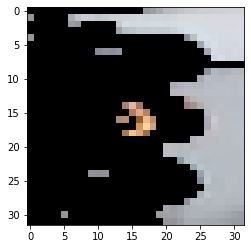

1
Shape of the image:  (32, 32, 3)
Images label:  [0, 0, 1]


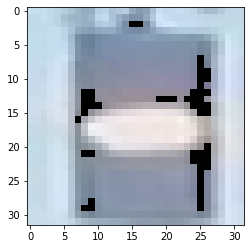

2
Shape of the image:  (32, 32, 3)
Images label:  [0, 0, 1]


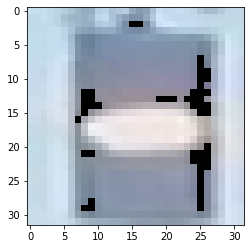

3
Shape of the image:  (32, 32, 3)
Images label:  [0, 0, 1]


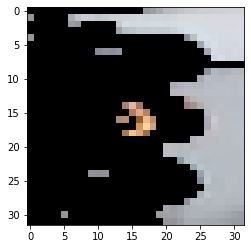

4
Shape of the image:  (32, 32, 3)
Images label:  [0, 1, 0]


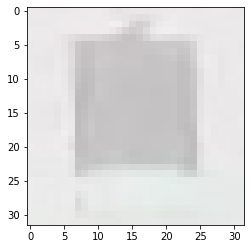

5
Shape of the image:  (32, 32, 3)
Images label:  [0, 1, 0]


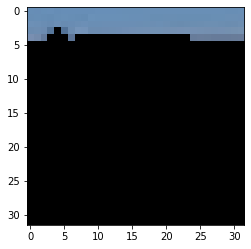

6
Shape of the image:  (32, 32, 3)
Images label:  [0, 1, 0]


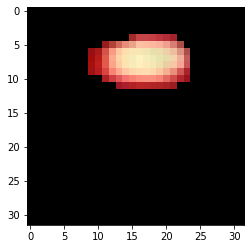

7
Shape of the image:  (32, 32, 3)
Images label:  [0, 0, 1]


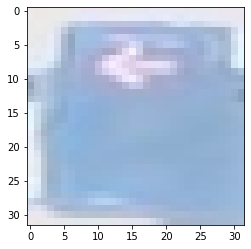

8
Shape of the image:  (32, 32, 3)
Images label:  [0, 1, 0]


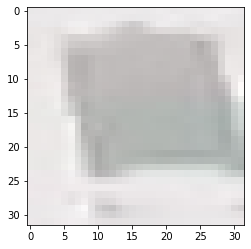

9
Shape of the image:  (32, 32, 3)
Images label:  [0, 1, 0]


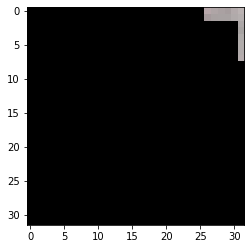

10
Shape of the image:  (32, 32, 3)
Images label:  [0, 1, 0]


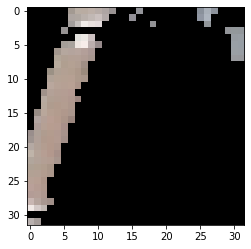

11
Shape of the image:  (32, 32, 3)
Images label:  [0, 1, 0]


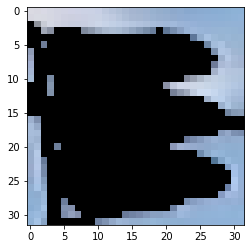

12
Shape of the image:  (32, 32, 3)
Images label:  [0, 0, 1]


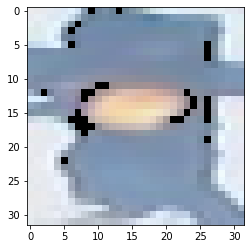

In [14]:
# Visualize misclassified example(s)
for i in range(0,len(MISCLASSIFIED)):
    selected_image = MISCLASSIFIED[i][0]
    print(i)
    print('Shape of the image: ', selected_image.shape)
    print('Images label: ', MISCLASSIFIED[i][1])
    estimate_label(selected_image)
    plt.imshow(selected_image)
    plt.show()
